In [ ]:
# Install the pydicom library
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 21.7 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
import pandas as pd
import time
import pydicom
from scipy import interpolate

In [ ]:
data_simul0 = np.loadtxt ("3d-dose-map.dat")

In [ ]:
# Define a converter function to replace comma with period for floating point conversion
def comma_to_float(s):
    # Replace comma with period for floating point conversion
    # Expecting string input directly, no need to decode bytes
    return float(s.replace(',', '.'))

data_PDPexp = np.loadtxt ("PDPexp.txt", skiprows=1, usecols=(0, 1), converters={0: comma_to_float, 1: comma_to_float})
data_PDPteorico = np.loadtxt ("PDPteorico.txt", skiprows=1, usecols=(0, 1), converters={0: comma_to_float, 1: comma_to_float})
data_PDteo = np.loadtxt ("Perfilteorico.txt", skiprows=1, usecols=(0, 1), converters={0: comma_to_float, 1: comma_to_float})
data_PDexp = np.loadtxt ("Perfilexp.txt", skiprows=1, usecols=(0, 1), converters={0: comma_to_float, 1: comma_to_float})

In [ ]:
# Assign data from loaded files to plotting variables
profundidade = data_PDPexp[:, 0] # Assuming depth is the first column in the experimental data
dose_exp = data_PDPexp[:, 1] # Assuming dose is the second column in the experimental data

# Assuming the first column of data_PDPteorico is also depth data
profundidade_sim = data_PDPteorico[:, 0] # Store original theoretical depths
dose_sim_original = data_PDPteorico[:, 1] # Store original theoretical doses

# Create an interpolation function based on the original theoretical depth and dose data
f_interp_pdp = interpolate.interp1d(profundidade_sim, dose_sim_original, kind='linear', fill_value='extrapolate')

# Use the interpolation function to get theoretical dose values at the experimental depths
dose_sim = f_interp_pdp(profundidade)

In [ ]:
erro_pdp = np.abs(dose_exp - dose_sim)
dose_max_exp = np.max(dose_exp)
erro_pdp_medio_porcentagem = (np.mean(erro_pdp) / dose_max_exp) * 100

print(f"O erro médio é: {np.mean(erro_pdp)}")
print(f"O erro médio em porcentagem é: {erro_pdp_medio_porcentagem}%")

O erro médio é: 1.6071428571428565
O erro médio em porcentagem é: 1.6071428571428565%


In [ ]:
# Calcular o Mean Squared Error (MSE) para a curva PDP
mse_pdp = np.mean((dose_exp - dose_sim)**2)

# Calcular o Root Mean Squared Error (RMSE) para a curva PDP
rmse_pdp = np.sqrt(mse_pdp)

print(f"O RMSE da curva PDP é: {rmse_pdp}")

O RMSE da curva PDP é: 2.0231819755332063


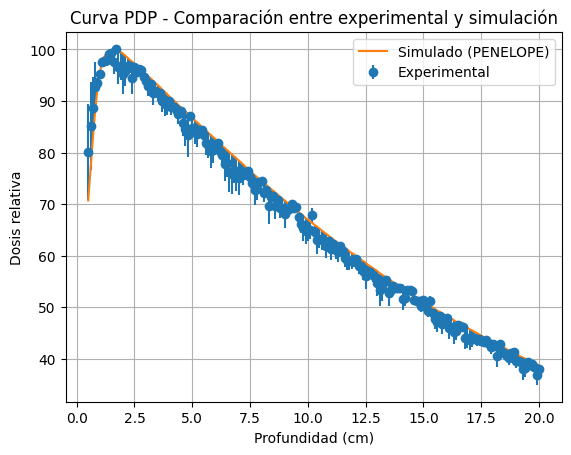

In [ ]:
# Plot the experimental dose against its corresponding depth data with error bars
plt.errorbar(profundidade, dose_exp, yerr=erro_pdp, fmt='o', label='Experimental')
# Plot the interpolated simulated dose against the experimental depth points
plt.plot(profundidade, dose_sim, '-', label='Simulado (PENELOPE)')
plt.xlabel('Profundidad (cm)')
plt.ylabel('Dosis relativa')
plt.title('Curva PDP - Comparación entre experimental y simulación')
plt.legend()
plt.grid(True)

In [ ]:
# Assuming the first column of data_PDexp is the lateral distance data for the experimental profile
eixo_x = data_PDexp[:, 0]
# Assuming the second column of data_PDexp is the dose data for the experimental profile
dose_exp_pd = data_PDexp[:, 1]
# Assuming the first column of data_PDteo is the lateral distance data for the theoretical profile
eixo_x_sim = data_PDteo[:, 0] # Get the x-coordinates for the theoretical data
# Assuming the second column of data_PDteo is the dose data for the theoretical profile
dose_sim_pd_original = data_PDteo[:, 1] # Store the original theoretical dose data

# Recreate erro_exp if needed for the PD plot, based on the size of dose_exp_pd
# Assuming no explicit error data is provided for the PD profile either
erro_exp_pd = np.zeros_like(dose_exp_pd)

In [ ]:
f_interp = interpolate.interp1d(eixo_x_sim, dose_sim_pd_original, kind='linear', fill_value='extrapolate')

# Use the interpolation function to get theoretical dose values at the experimental x-values
dose_sim_pd = f_interp(eixo_x)

# Calcular o Mean Squared Error (MSE) para a curva PD
mse_pd = np.mean((dose_exp_pd - dose_sim_pd)**2)

# Calcular o Root Mean Squared Error (RMSE) para a curva PD
rmse_pd = np.sqrt(mse_pd)

print(f"O RMSE da curva PD é: {rmse_pd}")

O RMSE da curva PD é: 1.4321217957725096


In [ ]:
# Now calculate the error using the interpolated theoretical dose
erro_exp_pd = np.abs(dose_exp_pd - dose_sim_pd)
dose_max_exp_pd = np.max(dose_exp_pd) # Dose máxima do perfil experimental
erro_pd_medio = np.mean(erro_exp_pd)
erro_pd_medio_porcentagem = (erro_pd_medio / dose_max_exp_pd) * 100

print(f"O erro médio do Perfil de Dose é: {erro_pd_medio}")
print(f"O erro médio do Perfil de Dose em porcentagem é: {erro_pd_medio_porcentagem}%")

O erro médio do Perfil de Dose é: 1.1745241885102977
O erro médio do Perfil de Dose em porcentagem é: 1.1745241885102977%


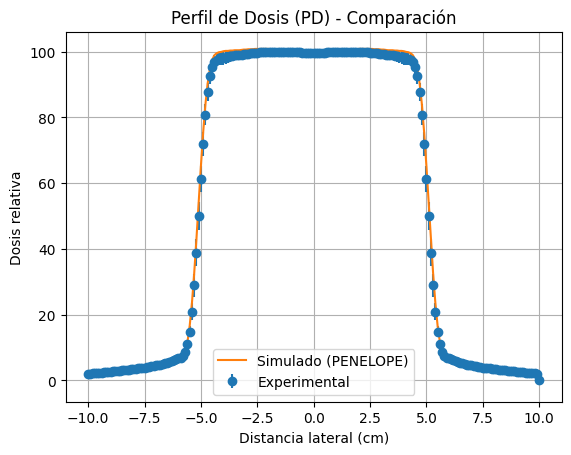

In [ ]:
# Use the correct experimental dose data (dose_exp_pd) for the y-axis
plt.errorbar(eixo_x, dose_exp_pd, yerr=erro_exp_pd, fmt='o', label='Experimental')

# Use interpolation to make dose_sim_pd have the same x-values as eixo_x
# Create an interpolation function based on the original theoretical x and y data
# Add fill_value='extrapolate' to allow extrapolation outside the original range
f_interp = interpolate.interp1d(eixo_x_sim, dose_sim_pd_original, kind='linear', fill_value='extrapolate')

# Use the interpolation function to get theoretical dose values at the experimental x-values
dose_sim_pd = f_interp(eixo_x)

# Use the correct theoretical dose data (dose_sim_pd) for the y-axis after interpolation
plt.plot(eixo_x, dose_sim_pd, label='Simulado (PENELOPE)')
plt.xlabel('Distancia lateral (cm)')
plt.ylabel('Dosis relativa')
plt.title('Perfil de Dosis (PD) - Comparación')
plt.legend()
plt.grid(True)

# Distribuição de dose Simulado

In [ ]:
tam_x = 101
tam_y = 101
x = int(tam_y/2)+1
y = int(tam_x/2)+1
z = int(tam_x/2)+1

# x e y fixos e z variável
idx  = np.where(data_simul0[:,5] == x)
data = data_simul0[idx[0],:]

idx2  = np.where(data[:,6] == y)
data2 = data[idx2[0],:]

# z fixo x e y variáveis
idx3  = np.where(data_simul0[:,7] == z)
data3 = data_simul0[idx3[0],:]
norma2 = 100*(data2[:,3]/np.max(data2[:,3]))

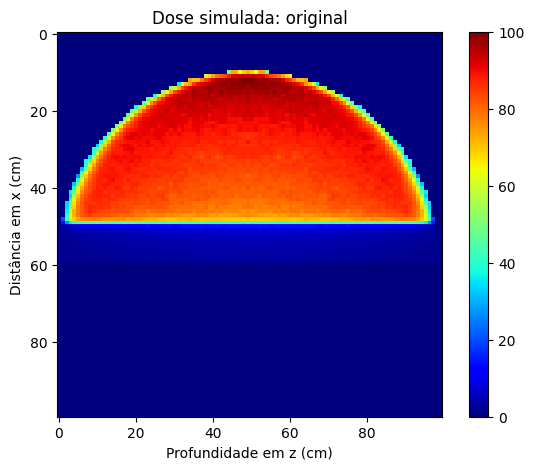

In [ ]:
norma = 100*(data[:,3]/np.max(data[:,3]))
v1 = np.reshape(data[:,1],(101,101)) #vetor p matriz
v2 = np.reshape(data[:,2],(101,101))
v3 = np.reshape(norma,(101,101)) #p cada valor v1 e v2 se tem um v3 associado
transposta = np.flip(v3, axis=1)

v_tot = v3 + transposta
normarot = 100*(v_tot[0:100,0:100]/np.max(v_tot[0:100,0:100]))
normarot = np.rot90(normarot,2)

plt.figure(figsize = (7,5))

plt.imshow(normarot,cmap = 'jet')
plt.colorbar();
plt.xlabel("Profundidade em z (cm)")
plt.ylabel("Distância em x (cm)")
plt.title('Dose simulada: original');

# Distribuição de dose Hospital

<Figure size 700x300 with 0 Axes>

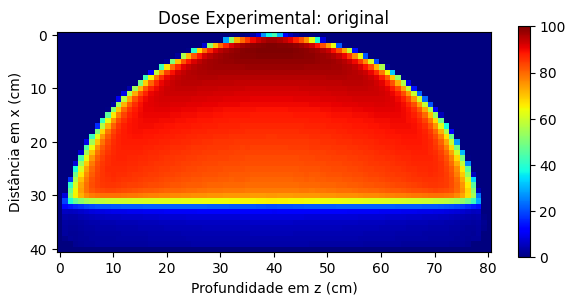

In [ ]:
#Distribuição OP2 (sem filtro)

plt.figure(figsize = (7,3))
t1 = time.time()
data_orig4 = pydicom.dcmread("distribdose_OP2HEG.dcm")
x = data_orig4.pixel_array
sob1 = 100*(x[13,0:42,0:82]/np.max(x[13,0:42,0:82]))

plt.figure(figsize = (7,3))

plt.imshow(sob1, cmap = 'jet')
plt.xlabel("Profundidade em z (cm)")
plt.ylabel("Distância em x (cm)")
plt.colorbar()
plt.title('Dose Experimental: original');

# Recorte usando OpenCV </font>

In [ ]:
def recorte(imagem, val_corte):
    imagem_new = imagem.copy()  # tira uma copia da imagem original
    thresh = cv2.threshold(imagem_new, val_corte, np.max(imagem), cv2.THRESH_BINARY)[1] #binariza, tornando zero todos os pixels menores que val_corte
    imagem_new[np.where((thresh)==0)] = 0  #aplica a binarização
    imagem_new = imagem_new[np.where([i.any()!=0 for i in imagem_new])[0]] #corte de todas as linhas nulas
    imagem_new = imagem_new[:,np.where([i.any()!=0 for i in np.transpose(imagem_new)])[0]]  #corte de todas as colunas
    return imagem_new

### Parâmetro de ajuste: Valor de pixel que queremos eliminar

In [ ]:
val_corte=30

### Recortando a imagem experimental

Text(0.5, 1.0, 'Dose hospital - recortada')

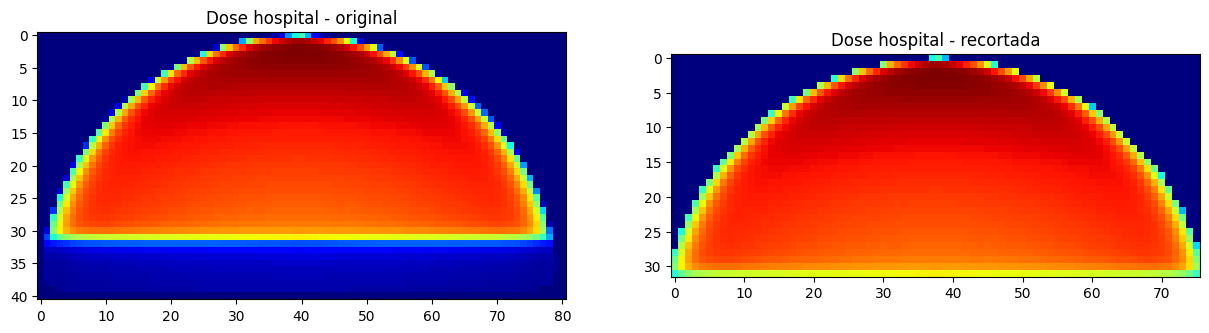

In [ ]:
sob1_rec = recorte(sob1,val_corte)

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.imshow(sob1,cmap = 'jet')
plt.title('Dose hospital - original')

plt.subplot(1,2,2)
plt.imshow(sob1_rec,cmap = 'jet')
plt.title('Dose hospital - recortada')

### Recortando a imagem simulada

Text(0.5, 1.0, 'Dose simulada - recortada')

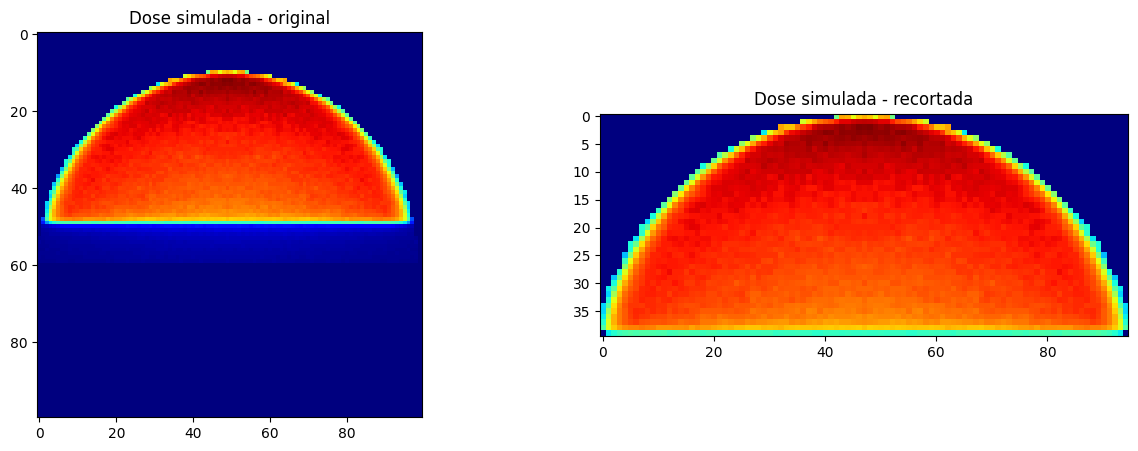

In [ ]:
simulada = normarot
simulada_rec = recorte(simulada,val_corte)

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.imshow(simulada,cmap = 'jet')
plt.title('Dose simulada - original')

plt.subplot(1,2,2)
plt.imshow(simulada_rec,cmap = 'jet')
plt.title('Dose simulada - recortada')

#  Ajustes interpolação </font>

In [ ]:
def interpola(imagem_ajuste,imagem_base,val_corte):
    #imagem_ajuste é a imagem a ser interpolada e imagem_base é a imagem com as dimensões finais desejadas
    x = np.arange(0,np.shape(imagem_ajuste)[0],1)
    y = np.arange(0,np.shape(imagem_ajuste)[1],1)
    f = interpolate.interp2d (x,y,imagem_ajuste.flatten(),kind='linear')
    xnew = np.linspace(x[0],x[-1],np.shape(imagem_base)[0])
    ynew = np.linspace(y[0],y[-1],np.shape(imagem_base)[1])
    imagem_interp = np.transpose(f(xnew,ynew))
    #imagem_interp[np.where(imagem_interp<val_corte)]=0
    return imagem_interp

### Hipótese 1: Deixando as dimensões da imagem simulada iguais as da imagem experimental

In [ ]:
def interpola(imagem_ajuste,imagem_base,val_corte):
    #imagem_ajuste é a imagem a ser interpolada e imagem_base é a imagem com as dimensões finais desejadas
    x = np.arange(0,np.shape(imagem_ajuste)[0],1)
    y = np.arange(0,np.shape(imagem_ajuste)[1],1)
    # Replaced interpolate.interp2d with interpolate.RectBivariateSpline
    # interpolate.RectBivariateSpline expects x and y as 1D arrays and z as a 2D array
    # The output of RectBivariateSpline is a callable function similar to interp2d
    # Removed the 'kind' argument as RectBivariateSpline does not accept it
    f = interpolate.RectBivariateSpline(x, y, imagem_ajuste)
    xnew = np.linspace(x[0],x[-1],np.shape(imagem_base)[0])
    ynew = np.linspace(y[0],y[-1],np.shape(imagem_base)[1])
    # The call signature for the callable returned by RectBivariateSpline is f(xnew, ynew)
    # where xnew and ynew are 1D arrays of the new coordinates.
    # The result is a 2D array with shape (len(xnew), len(ynew)).
    # We need to transpose this result to match the expected output format.
    # REMOVED .T HERE TO MATCH THE SHAPE OF imagem_base
    imagem_interp = f(xnew,ynew)
    #imagem_interp[np.where(imagem_interp<val_corte)]=0
    return imagem_interp

% pixels com diferença > 1 58.34703947368421
Diferença Máxima: 76.09036267458288
(32, 76)
(40, 95)


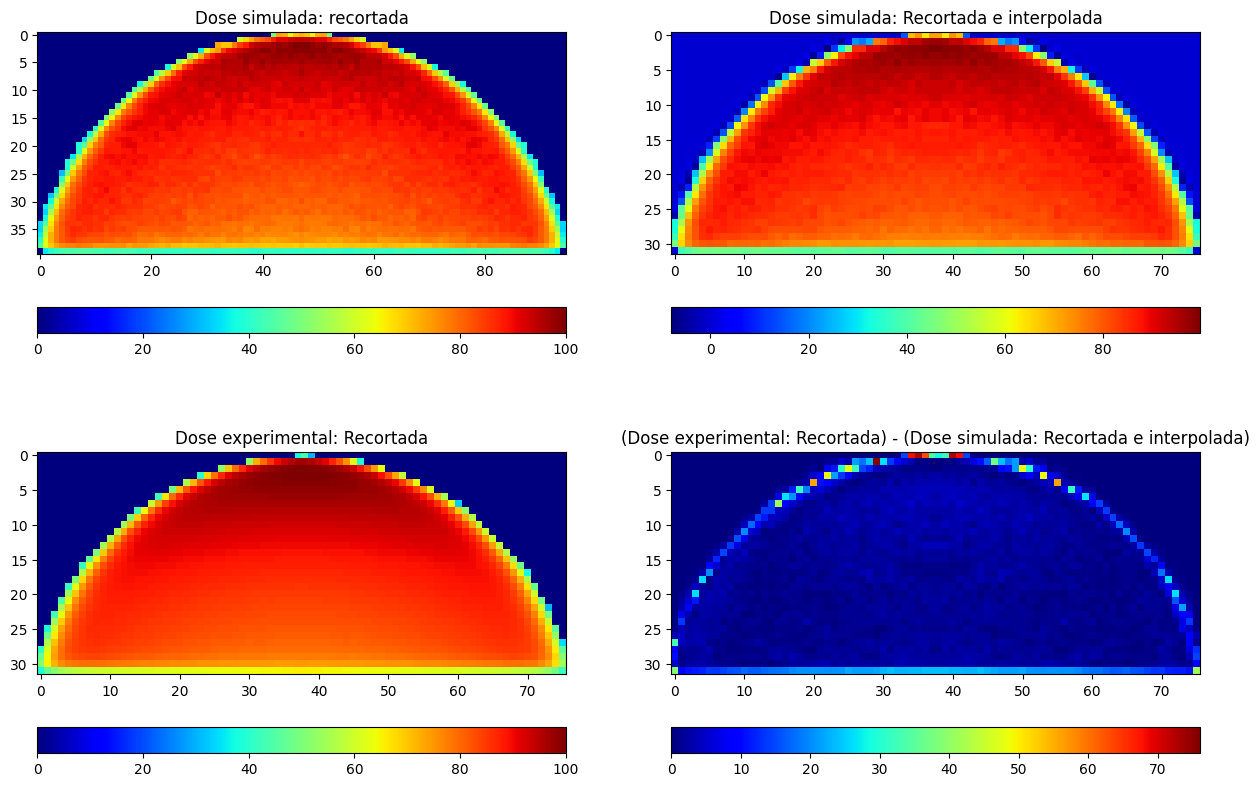

In [ ]:
# Hipótese 1: Deixando as dimensões da imagem simulada iguais as da imagem experimental
# Assign imagem_base1 and imagem_ajuste1 before interpolating
imagem_base1 = sob1_rec.copy()  #imagem a ser ajustada
imagem_ajuste1 = simulada_rec.copy() # dimensões de base

imagem_interp1 = interpola(imagem_ajuste1,imagem_base1,val_corte)

plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
plt.imshow(imagem_ajuste1,cmap = 'jet')
plt.colorbar( orientation = "horizontal");
plt.title('Dose simulada: recortada')

plt.subplot(2,2,2)
plt.imshow(imagem_interp1,cmap='jet')
plt.colorbar( orientation="horizontal");
plt.title('Dose simulada: Recortada e interpolada')

plt.subplot(2,2,3)
plt.imshow(imagem_base1,cmap='jet')
plt.colorbar( orientation="horizontal");
plt.title('Dose experimental: Recortada')

plt.subplot(2,2,4)
plt.imshow(np.abs(imagem_base1 - imagem_interp1),cmap = 'jet')
plt.title('(Dose experimental: Recortada) - (Dose simulada: Recortada e interpolada)')
plt.colorbar( orientation = "horizontal");

print("% pixels com diferença > 1",100*np.shape(np.where(np.abs(imagem_base1-imagem_interp1)>1))[1]/(np.shape(imagem_base1)[0]*np.shape(imagem_base1)[1]))
print("Diferença Máxima:",np.max(np.abs(imagem_base1 - imagem_interp1)))

print (np.shape(imagem_base1)) #experim
print (np.shape(imagem_ajuste1)) #simulada

### Hipótese 2: Deixando as dimensões da imagem experimental iguais as da imagem simulada

In [ ]:
imagem_base2 = simulada_rec.copy()  #imagem a ser ajustada
imagem_ajuste2 = sob1_rec.copy() # dimensões de base

imagem_interp2 = interpola(imagem_ajuste2,imagem_base2,val_corte)

% pixels com diferença > 1 58.421052631578945
Diferença máxima: 79.92852926285163


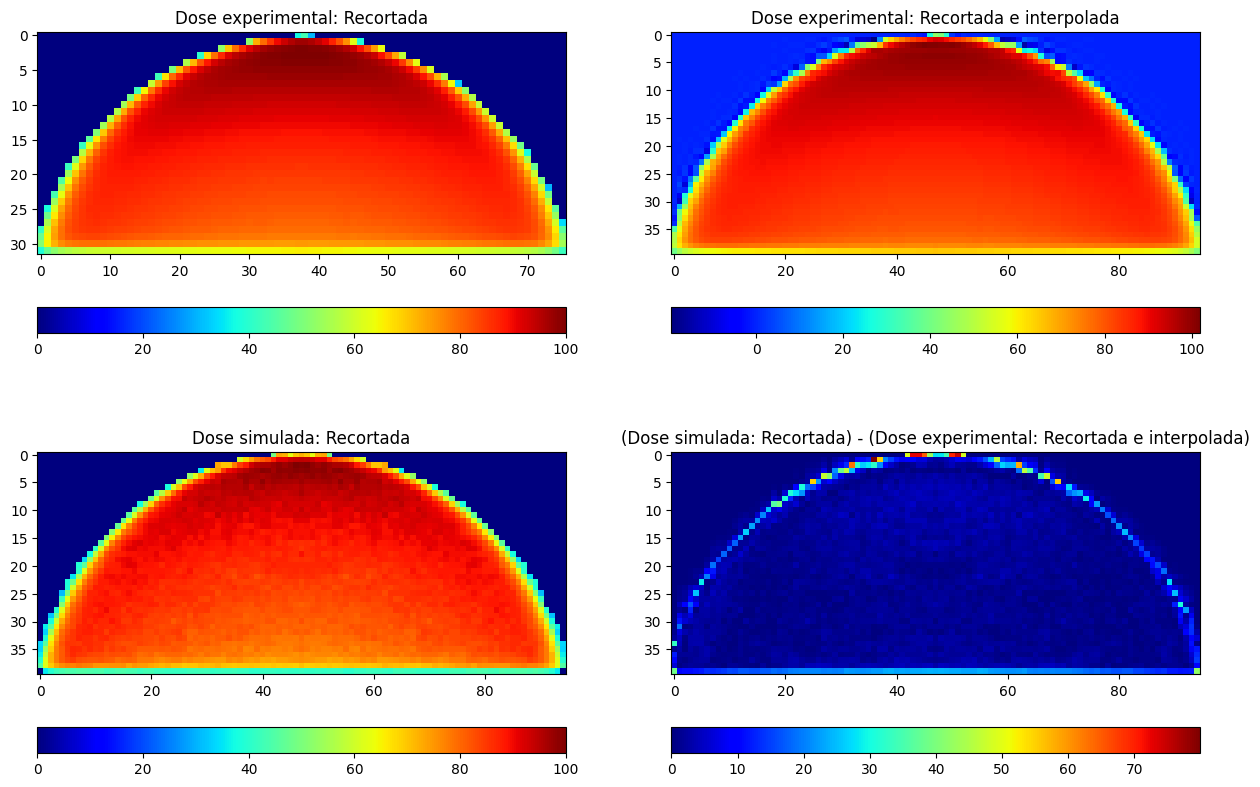

In [ ]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
plt.imshow(imagem_ajuste2,cmap = 'jet')
plt.colorbar( orientation = "horizontal");
plt.title('Dose experimental: Recortada')

plt.subplot(2,2,2)
plt.imshow(imagem_interp2,cmap = 'jet')
plt.colorbar( orientation = "horizontal");
plt.title('Dose experimental: Recortada e interpolada')

plt.subplot(2,2,3)
plt.imshow(imagem_base2,cmap = 'jet')
plt.colorbar( orientation = "horizontal");
plt.title('Dose simulada: Recortada')

plt.subplot(2,2,4)
plt.imshow(np.abs(imagem_base2 - imagem_interp2),cmap = 'jet')
plt.colorbar( orientation = "horizontal");
plt.title('(Dose simulada: Recortada) - (Dose experimental: Recortada e interpolada)')


print("% pixels com diferença > 1",100*np.shape(np.where(np.abs(imagem_base2-imagem_interp2)>1))[1]/(np.shape(imagem_base2)[0]*np.shape(imagem_base2)[1]))
print("Diferença máxima:",np.max(np.abs(imagem_base2 - imagem_interp2)))

Text(0.5, 0, '%')

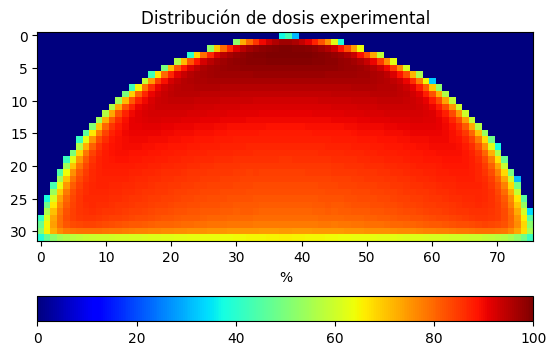

In [ ]:
plt.imshow(imagem_ajuste2,cmap = 'jet')
plt.colorbar( orientation = "horizontal");
plt.title('Distribución de dosis experimental')
plt.xlabel('%')

Text(0.5, 0, '%')

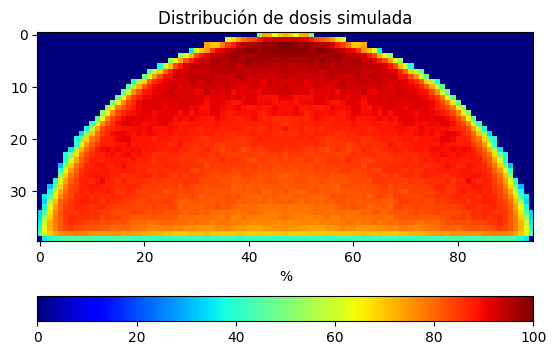

In [ ]:
plt.imshow(imagem_base2,cmap = 'jet')
plt.colorbar( orientation = "horizontal");
plt.title('Distribución de dosis simulada')
plt.xlabel('%')

# Cortando dentro da área da imagem de base

#### Passo 1: Binarizacao

Text(0.5, 1.0, 'binarizada')

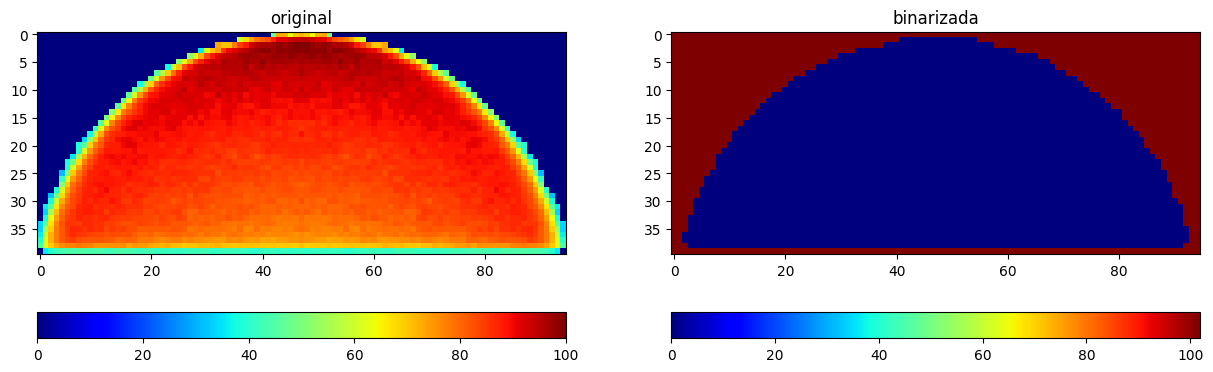

In [ ]:
ret, thresh = cv2.threshold(imagem_interp2,70, np.max(imagem_interp2), cv2.THRESH_BINARY_INV)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.imshow(imagem_base2,cmap = 'jet')
plt.colorbar( orientation = "horizontal");
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(thresh,cmap = 'jet')
plt.colorbar(orientation = "horizontal");
plt.title('binarizada')

#### Passo 2: Encontra as bordas

Text(0.5, 1.0, 'coordenadas das bordas')

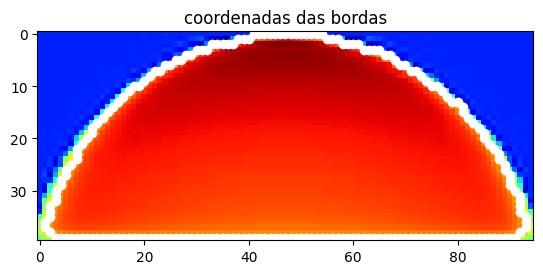

In [ ]:
# encontra os contours
contours, hierarchy = cv2.findContours(thresh.astype(np.uint8),cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE) #determina contornos
contours = sorted(contours, key = cv2.contourArea,reverse=True)  # contorno de maior área
cont2plot = np.reshape(contours[1],(np.shape(contours[1])[0],np.shape(contours[1])[2])) #arruma a dimensão


plt.plot(cont2plot[:,0],cont2plot[:,1],'wo')
plt.imshow (imagem_interp2, cmap = 'jet')
plt.title('coordenadas das bordas')


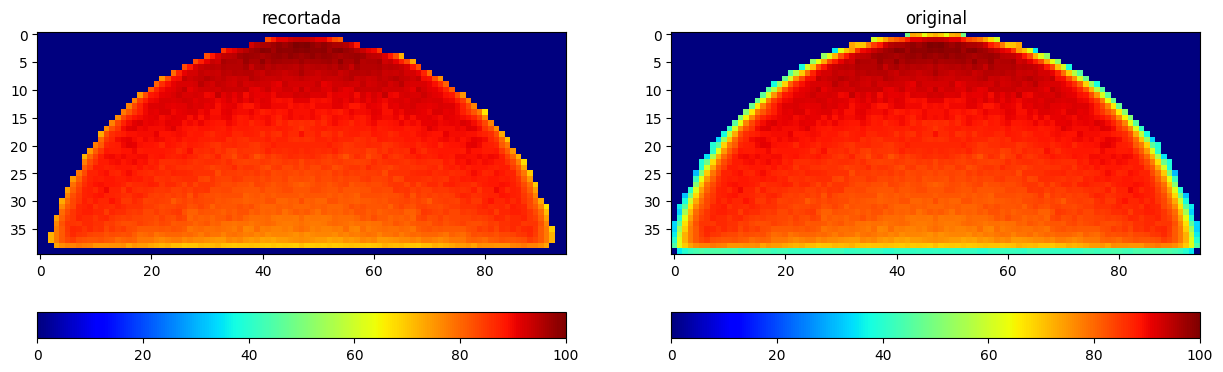

In [ ]:
# original image
# -1 loads as-is so if it will be 3 or 4 channel as the original
image = imagem_base2.copy()
img_base_recortada=cv2.fillPoly(image, contours, 0)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.imshow(img_base_recortada,cmap='jet')
plt.title('recortada')
plt.colorbar(orientation = "horizontal");
plt.subplot(1,2,2)
plt.title('original')

plt.imshow(imagem_base2,cmap='jet')
plt.colorbar(orientation = "horizontal");

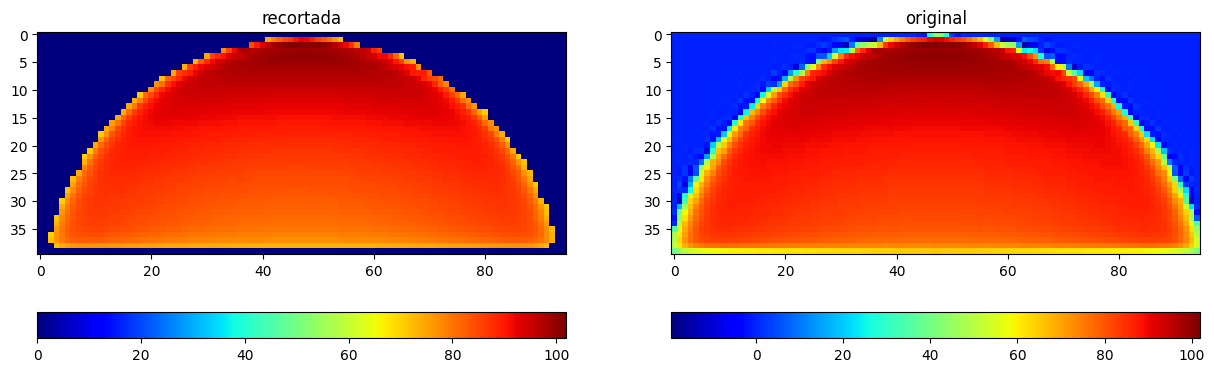

In [ ]:
image = imagem_interp2.copy()
img_interp_recortada=cv2.fillPoly(image, contours, 0)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.imshow(img_interp_recortada,cmap='jet')
plt.title('recortada')
plt.colorbar(orientation = "horizontal");
plt.subplot(1,2,2)
plt.title('original')

plt.imshow(imagem_interp2,cmap='jet')
plt.colorbar(orientation = "horizontal");

# Resumindo: Imagens img_base_recortada e img_interp_recortada devem ser usadas para o cálculo do índice gama

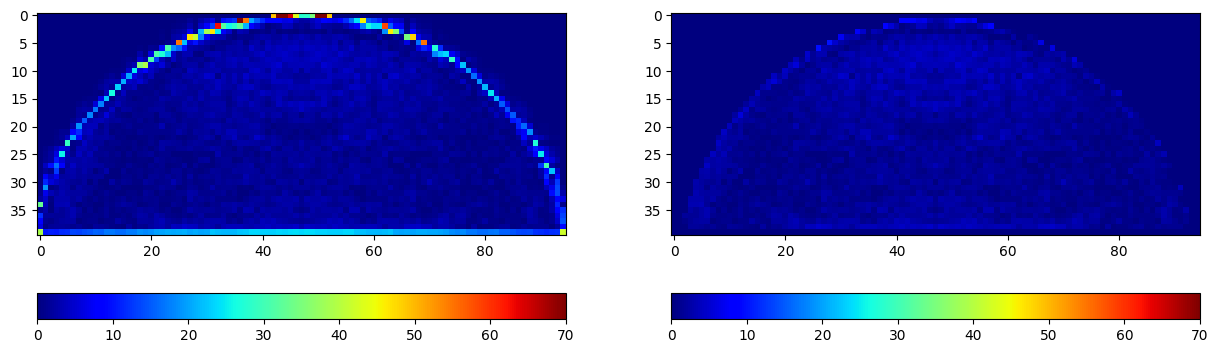

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.imshow(np.abs(imagem_base2 - imagem_interp2),cmap = 'jet',vmin=0,vmax=70)
plt.colorbar(orientation = "horizontal");
plt.subplot(1,2,2)
plt.imshow(np.abs(img_base_recortada-img_interp_recortada),cmap = 'jet',vmin=0,vmax=70)
plt.colorbar(orientation = "horizontal");

In [ ]:
idx = np.shape(img_base_recortada)[0] #dimensão da imagem
idy = np.shape(img_interp_recortada)[1]

dose = img_base_recortada
doseR = img_interp_recortada

x = np.arange(0,idx)
y = np.arange(0,idy)
xr = np.arange(0,idx)
yr = np.arange(0,idy)

dta = 0.3
tol = 3

criterio = np.ones(np.shape(doseR),dtype = int) #ele já eh um vetor de 1, modifica para 0 se for <=1
teste_dose = np.ones(np.shape(doseR),dtype = int)

In [ ]:
for xx in range(0,len(x)):
    for yy in range(0,len(y)):
        gama1 = np.zeros(np.shape(doseR))
        for i in range(0,len(x)):
            for j in range(0,len(y)):
                r2 = (x[i]-xr[xx])**2 + (y[j]-yr[yy])**2
                delta = np.abs(dose[i,j] - doseR[xx,yy])
                gama1[i,j] = np.sqrt((r2**2/dta**2) + (delta/tol**2))
                teste_dose[xx,yy] = np.min(gama1)
        if np.min(gama1)<= 1:
            criterio[xx,yy] = 0

print('Resultado: 0 = Aceitável e 1 = Não aceitável')
pd.DataFrame(criterio,index = xr,columns = yr)

Resultado: 0 = Aceitável e 1 = Não aceitável


,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
npt = 100* np.sum(np.sum(criterio))/(len(x)**2)
print('% de pontos não aceitáveis:',npt)

% de pontos não aceitáveis: 0.1875


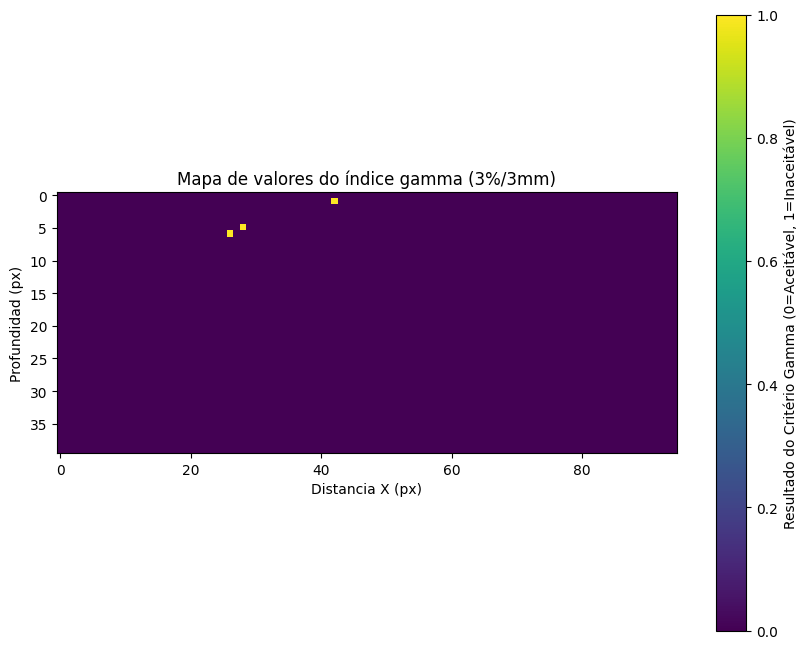


Análise Quantitativa dos Pontos que Falharam no Critério Gamma (γ > 1):
Número de pontos onde o índice gamma falhou (γ > 1): 3
Número total de pontos avaliados: 3800
Porcentagem de pontos onde o índice gamma falhou: 0.08%
Legenda detalhada do índice gamma (γ):
- γ ≤ 1: O ponto de dose simulado está dentro dos critérios de tolerância (3% na dose e 3mm na distância) em relação a pelo menos um ponto experimental. Estes pontos são considerados aceitáveis.
- γ > 1: O ponto de dose simulado está fora dos critérios de tolerância (3% na dose e 3mm na distância) em relação a todos os pontos experimentais. Estes pontos são considerados inaceitáveis.

Implicações Clínicas dos Valores de γ:
- Valores de γ baixos (≤ 1) indicam uma boa concordância entre a dose simulada e a dose experimental. Isso sugere que a simulação está representando de forma precisa a distribuição de dose que seria entregue ao paciente, o que é crucial para a segurança e eficácia do tratamento radioterápico.
- Valores de γ al

In [ ]:
plt.figure(figsize=(10, 8))
# Use um mapa de cores que destaque os valores acima de 1
# O 'viridis' é um bom cmap perceptualmente uniforme
plt.imshow(teste_dose, cmap='viridis', interpolation='none')
plt.colorbar(label='Resultado do Critério Gamma (0=Aceitável, 1=Inaceitável)')
plt.title('Mapa de valores do índice gamma (3%/3mm)')
plt.xlabel('Distancia X (px)')
plt.ylabel('Profundidad (px)')
plt.grid(False)
plt.show()

pontos_falharam_idx = np.where(criterio == 1)
numero_pontos_falharam = len(pontos_falharam_idx[0])
numero_total_pontos = criterio.size
porcentagem_falhou = (numero_pontos_falharam / numero_total_pontos) * 100

print(f"\nAnálise Quantitativa dos Pontos que Falharam no Critério Gamma (γ > 1):")
print(f"Número de pontos onde o índice gamma falhou (γ > 1): {numero_pontos_falharam}")
print(f"Número total de pontos avaliados: {numero_total_pontos}")
print(f"Porcentagem de pontos onde o índice gamma falhou: {porcentagem_falhou:.2f}%")


# Adicionar legenda detalhada
print("Legenda detalhada do índice gamma (γ):")
print("- γ ≤ 1: O ponto de dose simulado está dentro dos critérios de tolerância (3% na dose e 3mm na distância) em relação a pelo menos um ponto experimental. Estes pontos são considerados aceitáveis.")
print("- γ > 1: O ponto de dose simulado está fora dos critérios de tolerância (3% na dose e 3mm na distância) em relação a todos os pontos experimentais. Estes pontos são considerados inaceitáveis.")

# Relacionar desvios com impacto clínico
print("\nImplicações Clínicas dos Valores de γ:")
print("- Valores de γ baixos (≤ 1) indicam uma boa concordância entre a dose simulada e a dose experimental. Isso sugere que a simulação está representando de forma precisa a distribuição de dose que seria entregue ao paciente, o que é crucial para a segurança e eficácia do tratamento radioterápico.")
print("- Valores de γ altos (> 1) indicam discrepâncias significativas entre a dose simulada e a experimental. Isso pode significar que a simulação não está capturando corretamente a física da interação da radiação, ou que há diferenças no ambiente experimental. Desvios grandes podem resultar em entrega de dose sub-ótima para o volume alvo (reduzindo a chance de controle do tumor) ou entrega de dose excessiva para tecidos saudáveis circundantes (aumentando o risco de toxicidade). Portanto, valores de γ > 1 em áreas clinicamente relevantes (como o volume alvo e órgãos de risco próximos) requerem investigação e, possivelmente, re-planejamento do tratamento ou ajustes na simulação.")

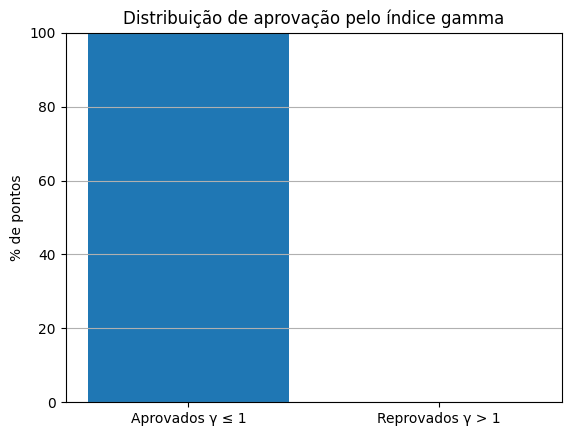

In [ ]:
porcentagem_aprovada = np.mean(gamma_pass) * 100

plt.bar(['Aprovados γ ≤ 1', 'Reprovados γ > 1'], [porcentagem_aprovada, 100 - porcentagem_aprovada])
plt.ylabel('% de pontos')
plt.title('Distribuição de aprovação pelo índice gamma')
plt.ylim(0, 100)
plt.grid(True, axis='y')